## ***1. Reading COVID-Cases***

In [41]:
import pandas as pd

# Read the COVID‐19 long‐format CSV
input_csv = r'D:\WY-COVID Data\Wyoming_Covid-Analysis\complete_state_wide_covid_cases.csv'
df = pd.read_csv(input_csv)


# Filter to Wyoming only 
wy_covid = df[df['Province_State'] == 'Wyoming'].copy()

# Convert Date to datetime and sort 
wy_covid['Date'] = pd.to_datetime(wy_covid['Date'])
wy_covid = wy_covid.sort_values('Date')

# Aggregate cumulative cases by Date
wy_cumulative = (
    wy_covid
    .groupby('Date')['Cases']
    .sum()
    .reset_index(name='cum_cases_wy')
)

# Compute daily new cases for the entire state 
wy_cumulative['daily_new_cases_wy'] = (
    wy_cumulative['cum_cases_wy']
    .diff()            
    .clip(lower=0)     
    .fillna(0)         
)

# Keep only the columns we need 
wy_daily = wy_cumulative[['Date', 'cum_cases_wy', 'daily_new_cases_wy']]

wy_daily.head (10)



,Date,cum_cases_wy,daily_new_cases_wy
0,2020-01-22,0,0.0
1,2020-01-23,0,0.0
2,2020-01-24,0,0.0
3,2020-01-25,0,0.0
4,2020-01-26,0,0.0
5,2020-01-27,0,0.0
6,2020-01-28,0,0.0
7,2020-01-29,0,0.0
8,2020-01-30,0,0.0
9,2020-01-31,0,0.0


### ***2. Normalizing the Daily Cases by State Popualtion (2022)***

In [42]:
# Normalizationy by state population estimates for the year 2022
wy_daily ['daily_new_cases_wy_norm'] = (wy_daily['daily_new_cases_wy']/581978)*10000

wy_daily.head (100)

,Date,cum_cases_wy,daily_new_cases_wy,daily_new_cases_wy_norm
0,2020-01-22,0,0.0,0.000000
1,2020-01-23,0,0.0,0.000000
2,2020-01-24,0,0.0,0.000000
3,2020-01-25,0,0.0,0.000000
4,2020-01-26,0,0.0,0.000000
...,...,...,...,...
95,2020-04-26,502,11.0,0.189011
96,2020-04-27,520,18.0,0.309290
97,2020-04-28,536,16.0,0.274924
98,2020-04-29,545,9.0,0.154645


## ***3. Time Series Plot of the Daily Normalized COVID Cases for Wyoming***

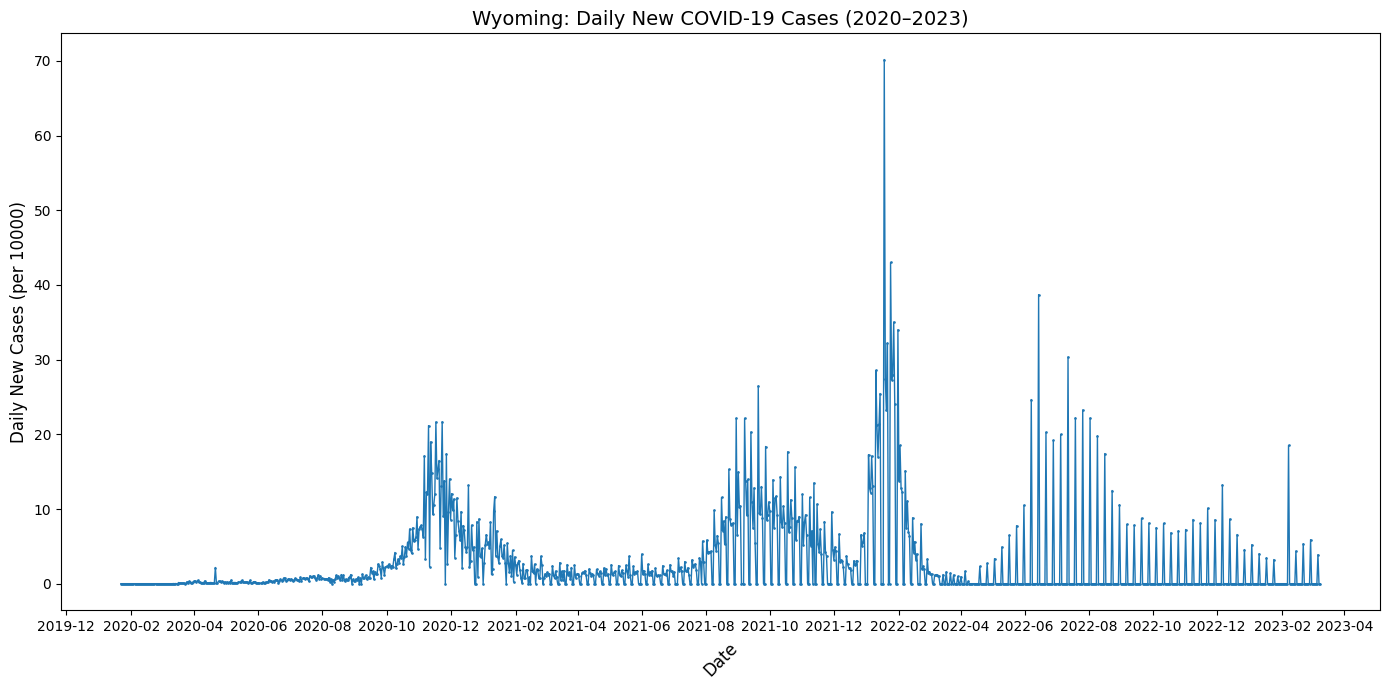

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

# Adjusting the figure size
fig, ax = plt.subplots (figsize=(14, 7))
colors = matplotlib.colormaps['tab20']

# Plot the Wyoming's time series: Date vs Cases per 10000 people
ax.plot ( wy_daily['Date'], wy_daily['daily_new_cases_wy_norm'],
          color = colors(0),
          linewidth = 1,
          linestyle= '-',
          marker = 'o',
          markersize = 0.9
          )

# Use Year-Month format ("%Y-%m-%d")
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))


# Set Plot title and axis labels
ax.set_title("Wyoming: Daily New COVID-19 Cases (2020–2023)", fontsize=14)
ax.set_xlabel("Date", fontsize=12, rotation = 45)
ax.set_ylabel("Daily New Cases (per 10000)", fontsize=12)

# Tight Layout and Show
plt.tight_layout ()
plt.show ()
